# In this notebook, we will be practicing image classification using furniture datasets that have been split into 5 classifications: TV, Table, Fridge, Chair, Cabinet

In [1]:
# !{sys.executable} -m pip install pillow
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *

2024-08-23 11:06:13.636758: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Preprocessing with ImageDataGenerator

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

preprocess_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

## Load Training Data

In [3]:
train_generator = preprocess_datagen.flow_from_directory(
    './furniture_dataset/train',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
)

Found 10500 images belonging to 5 classes.


## Ensuring that Generator is Working as Properly


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip3.11 install --upgrade pip
Train Images Shape: (64, 224, 224, 3)
Train Labels Shape: (64, 5)


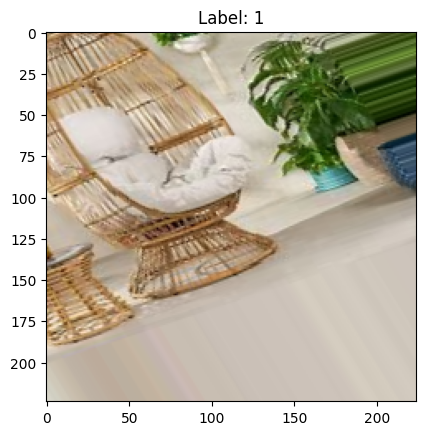

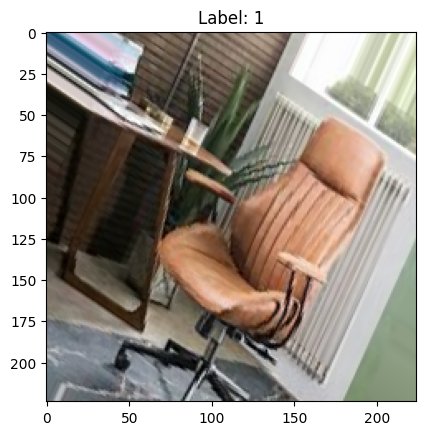

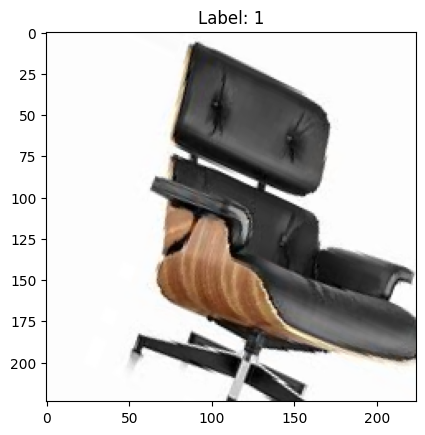

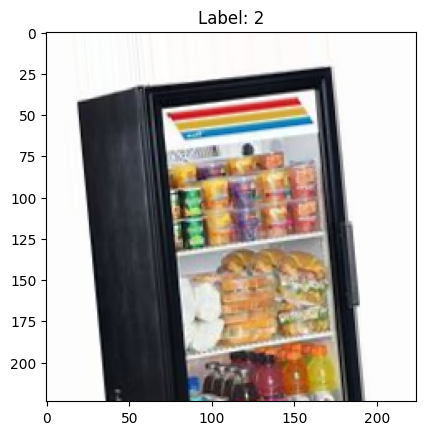

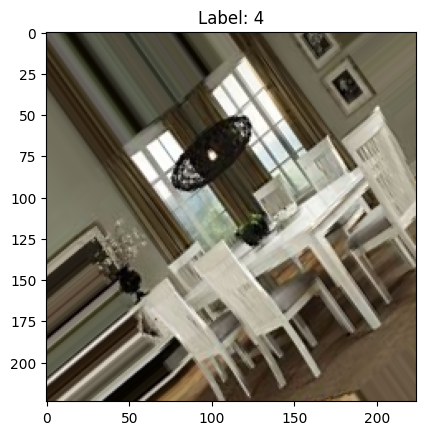

165


In [4]:
# !{sys.executable} -m pip install matplotlib

# Get one batch of data
train_images, train_labels = next(train_generator)

# Check the shape of the images and labels
print(f"Train Images Shape: {train_images.shape}")
print(f"Train Labels Shape: {train_labels.shape}")

# Optionally, visualize some images and their corresponding labels
import matplotlib.pyplot as plt

# Display the first 5 images and labels
for i in range(5):
    plt.imshow(train_images[i])
    plt.title(f"Label: {np.argmax(train_labels[i])}")
    plt.show()

print(len(train_generator))

## Load Validation Data

In [5]:
valid_generator = preprocess_datagen.flow_from_directory(
    './furniture_dataset/valid',
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
)

Found 2000 images belonging to 5 classes.


## Ensuring that Validation Generator Works

Validation Images Shape: (64, 224, 224, 3)
Validation Labels Shape: (64, 5)


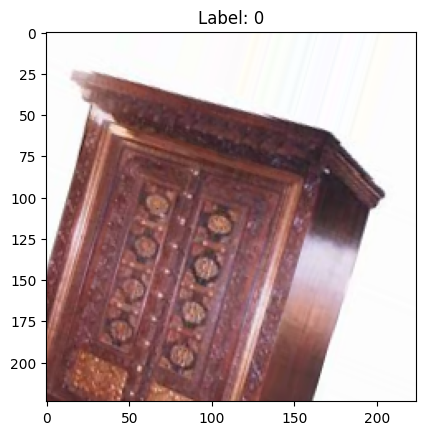

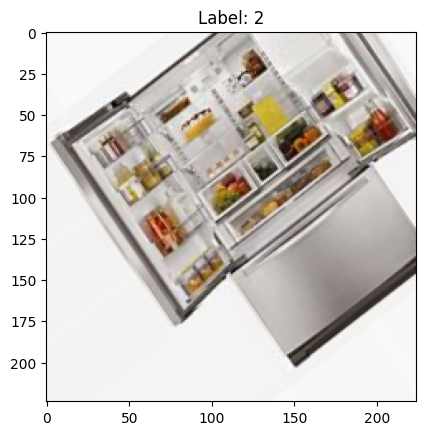

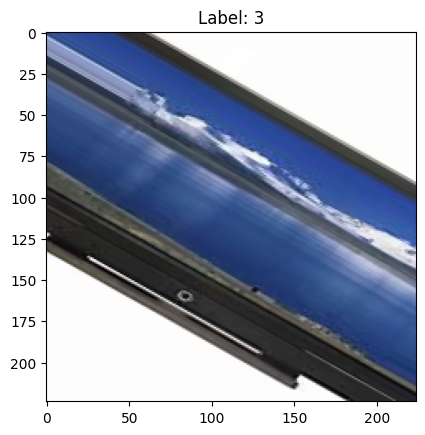

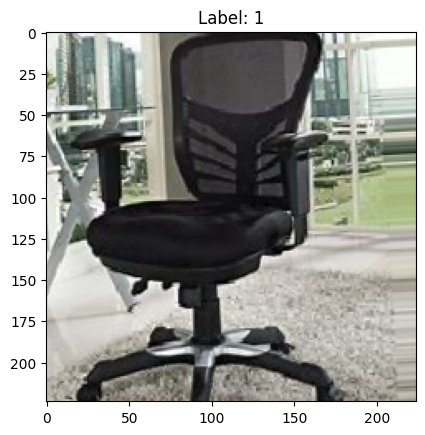

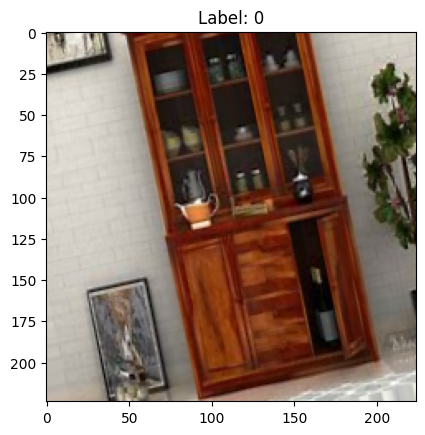

32


In [6]:
# Get one batch of data
valid_images, valid_labels = next(valid_generator)

# Check the shape of the images and labels
print(f"Validation Images Shape: {valid_images.shape}")
print(f"Validation Labels Shape: {valid_labels.shape}")

# Optionally, visualize some images and their corresponding labels
for i in range(5):
    plt.imshow(valid_images[i])
    plt.title(f"Label: {np.argmax(valid_labels[i])}")
    plt.show()

print(len(valid_generator))

## Load Testing Data

In [7]:
test_generator = preprocess_datagen.flow_from_directory(
    './furniture_dataset/test',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
)

Found 2500 images belonging to 5 classes.


## Pretrained Model

In [13]:
# !{sys.executable} -m pip install --upgrade certifi
from tensorflow.keras.applications import ResNet50V2

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

pretrained_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=[224,224,3])
pretrained_model.trainable = False;

for layer in pretrained_model.layers[-10:]:
    layers.trainable = True;

## Classification Model

In [14]:
model = keras.Sequential([
    pretrained_model,
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


## Fit Model

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=valid_generator,
    # callbacks=[early_stop],
)

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


165/165 ━━━━━━━━━━━━━━━━━━━━ 1813s 11s/step - accuracy: 0.8629 - loss: 1.5223 - val_accuracy: 0.9870 - val_loss: 0.0561
Epoch 2/50


2024-08-23 12:04:06.893575: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8
2024-08-23 12:04:15.894502: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


165/165 ━━━━━━━━━━━━━━━━━━━━ 1816s 11s/step - accuracy: 0.9609 - loss: 0.1574 - val_accuracy: 0.9880 - val_loss: 0.0564
Epoch 3/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1741s 11s/step - accuracy: 0.9627 - loss: 0.1726 - val_accuracy: 0.9925 - val_loss: 0.0253
Epoch 4/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1751s 11s/step - accuracy: 0.9639 - loss: 0.1575 - val_accuracy: 0.9920 - val_loss: 0.0267
Epoch 5/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1496s 9s/step - accuracy: 0.9728 - loss: 0.1168 - val_accuracy: 0.9925 - val_loss: 0.0235
Epoch 6/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1473s 9s/step - accuracy: 0.9748 - loss: 0.1368 - val_accuracy: 0.9955 - val_loss: 0.0262
Epoch 7/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1480s 9s/step - accuracy: 0.9791 - loss: 0.0911 - val_accuracy: 0.9965 - val_loss: 0.0166
Epoch 8/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1474s 9s/step - accuracy: 0.9779 - loss: 0.1028 - val_accuracy: 0.9960 - val_loss: 0.0109
Epoch 9/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1459s 9s/step - accuracy: 0.9829 - loss: 0.0943 - val_accu

## Plot Loss and Metric Curves


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip3.11 install --upgrade pip


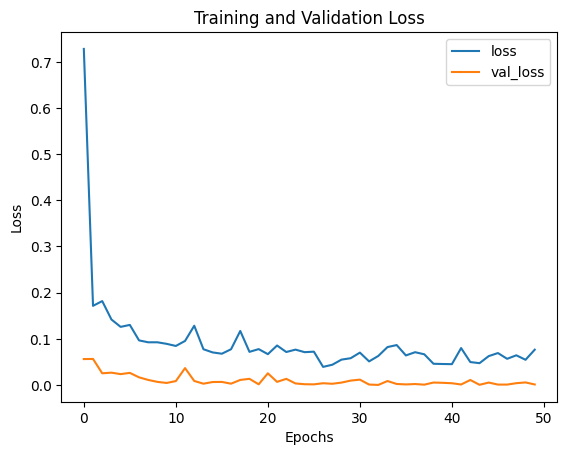

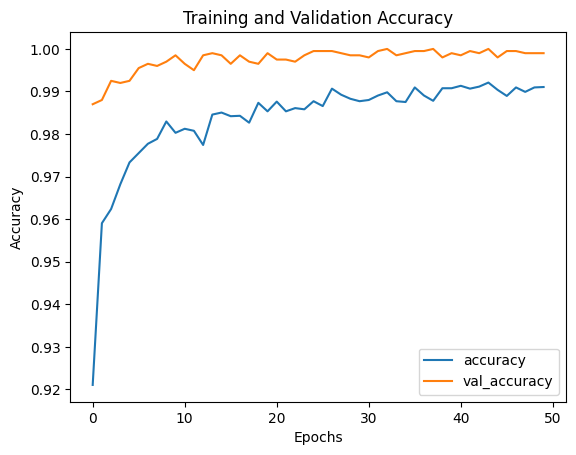

In [19]:
!{sys.executable} -m pip install pandas
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()